# <center><font color='purple' size=6><u>IPL Exploratory Data Analysis</u></font></center>

### What is an IPL?

IPL stands for the Indian Premier League. It is a professional Twenty20 cricket league in India that takes place annually. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007 and is considered one of the world's premier cricket tournaments. The IPL features teams representing various cities in India, and it has become a highly popular and lucrative event, attracting top cricket players from around the world.

### Task :-

Perform Exploratory Data Analysis(EDA) on Indian Premier League(IPL) Data.

<b>Dataset Link</b>:- https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020

There are two datasets that are being used in this analysis:
- <b>ipl_data</b>:- It gives the matches history like who won toss,who won the match,Player of the Match etc.
- <b>ipl_ball_data</b> :- It gives the data of every ball played in the history of ipl,with this very useful information can be extracted. 

### Importing Required Libraries And Dataset

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
ipl_data = pd.read_csv('IPL_Matches_2008_2022.csv')
ipl_ball_data = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')

In [4]:
ipl_ball_data.shape

(225954, 17)

In [5]:
ipl_data.shape

(950, 20)

- We have around 225954 rows with 17 columns in the <b>ipl_ball_data</b> Dataset
- And 950 rows with 20 columns in the <b>ipl_data</b> Dataset

In [6]:
ipl_ball_data.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [7]:
ipl_data.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


### Data Analysis 

In [8]:
ipl_data['Season'].unique() 

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

- The data is available from the start of the IPL ie, 2008 to 2022.

In [9]:
Teams = ipl_data['Team1'].unique()

In [10]:
ipl_data['WinningTeam'].replace(['Kings XI Punjab','Delhi Daredevils','Rising Pune Supergiants'],
                                ['Punjab Kings','Delhi Capitals','Rising Pune Supergiant'],inplace=True)

In [11]:
ipl_data['Team1'].replace(['Kings XI Punjab','Delhi Daredevils','Rising Pune Supergiants'],
                                ['Punjab Kings','Delhi Capitals','Rising Pune Supergiant'],inplace=True)

In [12]:
ipl_data['Team2'].replace(['Kings XI Punjab','Delhi Daredevils','Rising Pune Supergiants'],
                                ['Punjab Kings','Delhi Capitals','Rising Pune Supergiant'],inplace=True)

- Just because the dataset contains both new and old names of the teams, the above code is written to replace and combine the old data with the new.

### Matches Player and Winnings

In [13]:
Total_matches = ipl_data['Team1'].value_counts() + ipl_data['Team2'].value_counts()
Total_matches

Chennai Super Kings            208
Deccan Chargers                 75
Delhi Capitals                 224
Gujarat Lions                   30
Gujarat Titans                  16
Kochi Tuskers Kerala            14
Kolkata Knight Riders          223
Lucknow Super Giants            15
Mumbai Indians                 231
Pune Warriors                   46
Punjab Kings                   218
Rajasthan Royals               192
Rising Pune Supergiant          30
Royal Challengers Bangalore    226
Sunrisers Hyderabad            152
dtype: int64

- To get the total matches,the count of matches played by team 1 and team 2 is added.

In [14]:
matches_won = ipl_data['WinningTeam'].value_counts()
matches_won

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Delhi Capitals                 103
Punjab Kings                   101
Rajasthan Royals                96
Sunrisers Hyderabad             75
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Gujarat Titans                  12
Pune Warriors                   12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64

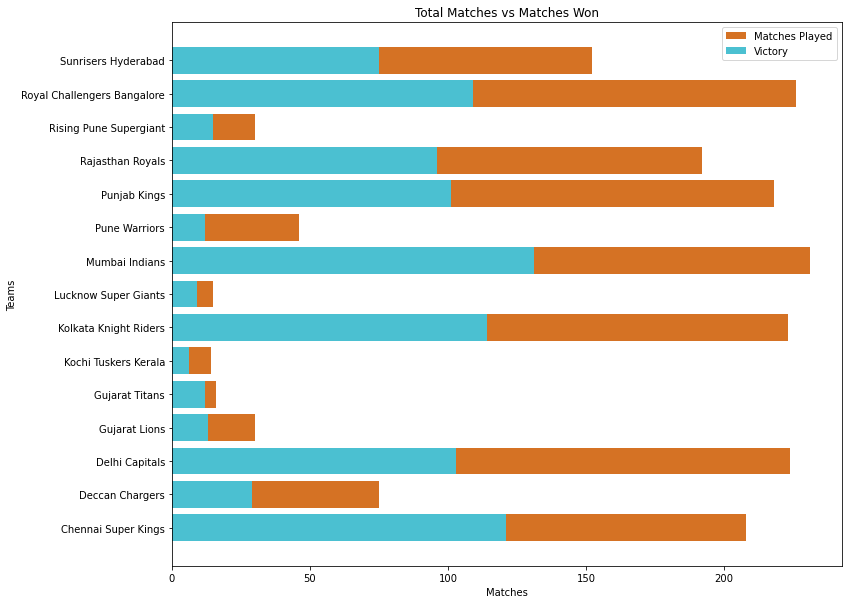

In [126]:
plt.figure(figsize = (12,10))
plt.barh(y=Total_matches.index,width=Total_matches,color='#D57224')
plt.barh(y=matches_won.index,width = matches_won,color='#4BC0D1')
plt.title('Total Matches vs Matches Won',fontsize=12)
plt.ylabel('Teams')
plt.xlabel('Matches')
plt.legend(['Matches Played','Victory'])
plt.show()

- <b>Mumbai Indians</b> being the most successful team with 5 titles has played the most matches and also won most matches compared to other teams in the IPL.
- According to the winning ratio <b>Gujrat Titans</b> leads the way with almost 75% win ratio followed by <b>Chennai Super Kings</b> having 59%.Also it is to be considered that Gujrat Titans is a recently formed team.
- <b>Kochi Tuskers</b> with the least matches played, the reason being they played only the 2011 season.
- Same goes for <b>Gujrat Titans</b> and <b>Lucknow Super Gaints</b> they were formed recently.

###  Toss Decisions

In [16]:
Toss = ipl_data['TossDecision'].value_counts()
Toss.reset_index()

,index,TossDecision
0,field,599
1,bat,351


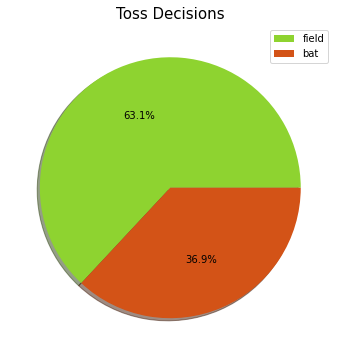

In [120]:
plt.figure(figsize=(6,6))
plt.pie(Toss,shadow = True,autopct='%1.1f%%',colors=['#8ED330','#D35317'])
plt.title('Toss Decisions',fontsize=15)
plt.legend(Toss.index,loc='upper right')
plt.show()

- Most of the winning toss decisions lead to field first and rarely Bat first is seen.

### Wickets Taken Criteria

In [36]:
ipl_ball_data['kind'].fillna(0,inplace = True) #filling all nan values with 0

In [37]:
out_type = ipl_ball_data[ipl_ball_data['kind']!=0]['kind'].value_counts() #omitting the 0 value to get the accuarate result
out_type

caught                   6837
bowled                   1944
run out                  1007
lbw                       685
stumped                   325
caught and bowled         323
hit wicket                 14
retired hurt               13
obstructing the field       2
retired out                 1
Name: kind, dtype: int64

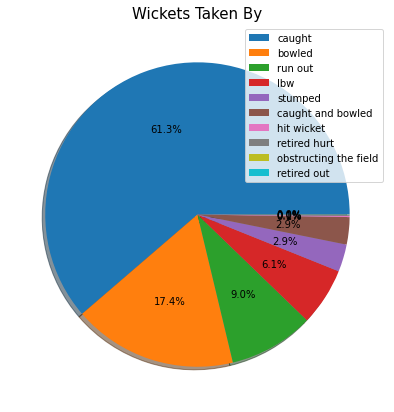

In [123]:
plt.figure(figsize=(7,7))
plt.pie(out_type,shadow = True,autopct='%1.1f%%')
plt.title('Wickets Taken By',fontsize=15)
plt.legend(out_type.index,loc = 'upper right')
plt.show()

- Around 61% wickets were catch out or caught by the fielder,followed by bowled.
- Most rare is retired hurt and obstructing the field

### Matches Winning criteria

In [40]:
won_by = ipl_data['WonBy'].value_counts()
won_by

Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

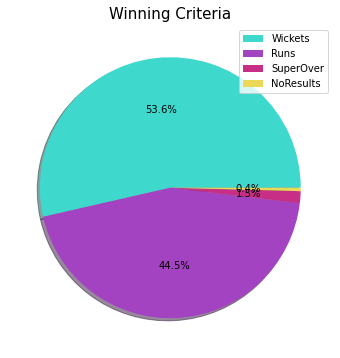

In [122]:
plt.figure(figsize=(6,6))
plt.pie(won_by,shadow = True,autopct='%1.1f%%',colors=['#3ED8CC','#A443C2','#C72F87','#EAD856'])
plt.title('Winning Criteria',fontsize=15)
plt.legend(won_by.index)
plt.show()

- More than 50% of the matches were won by Wickets, almost 45% with Runs and only 1.47% which lead to victory by Super Over. 

### Popular Venue/Staduim

In [42]:
venue = ipl_data['Venue'].value_counts()[:10] # to get top 10 venues with most played matches
venue

Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Feroz Shah Kotla                              60
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Sawai Mansingh Stadium                        47
Dubai International Cricket Stadium           46
Punjab Cricket Association Stadium, Mohali    35
Wankhede Stadium, Mumbai                      31
Name: Venue, dtype: int64

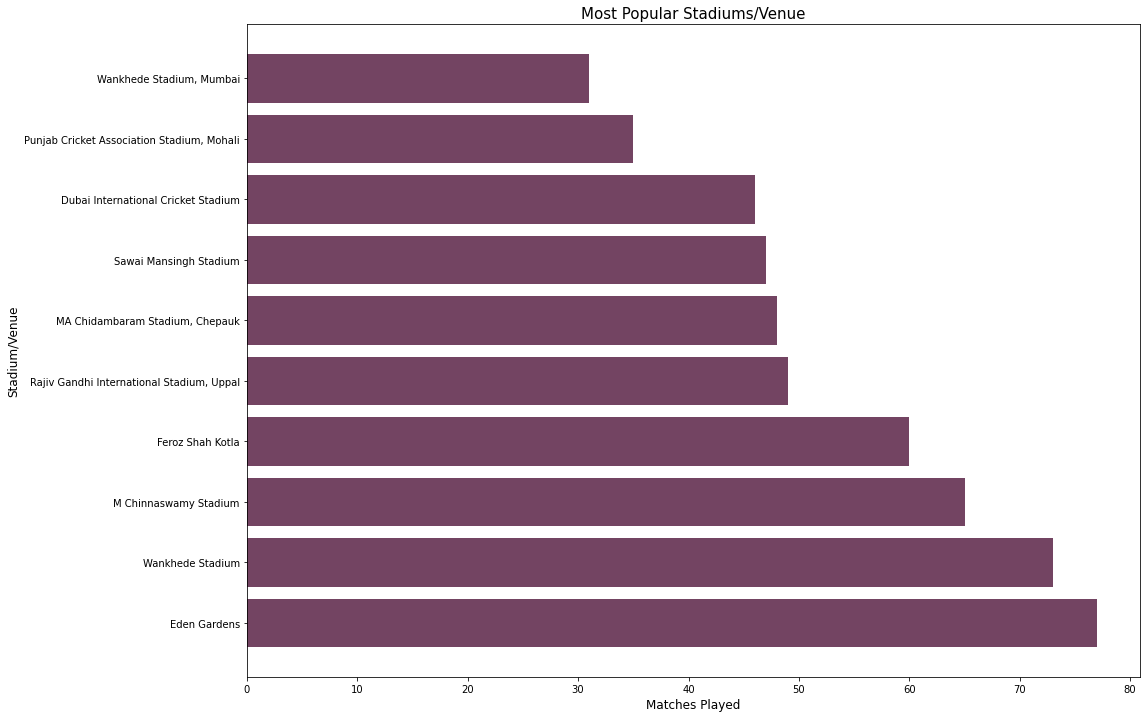

In [128]:
plt.figure(figsize=(16,12))
plt.barh(y = venue.index,width = venue.values,color='#734462')
plt.xlabel('Matches Played',fontsize=12)
plt.ylabel('Stadium/Venue',fontsize=12)
plt.title('Most Popular Stadiums/Venue',fontsize = 15)
plt.show()

- <b>Eden Gardens</b> being the second largest cricket ground in India is the most popular Stadium in which most IPL matches were played.With a seating capacity of over <b>66,000 spectators</b>, Eden Gardens has witnessed numerous iconic moments in Indian cricket. 

### Most Overs Bowled

In [44]:
Most_overs = ipl_ball_data[ipl_ball_data['ballnumber'] == 6]['bowler'].value_counts()[:10]# slicing to get the top 10 bowlers
Most_overs

R Ashwin           647
SP Narine          576
Harbhajan Singh    569
PP Chawla          542
B Kumar            539
A Mishra           539
RA Jadeja          530
DJ Bravo           514
YS Chahal          474
UT Yadav           468
Name: bowler, dtype: int64

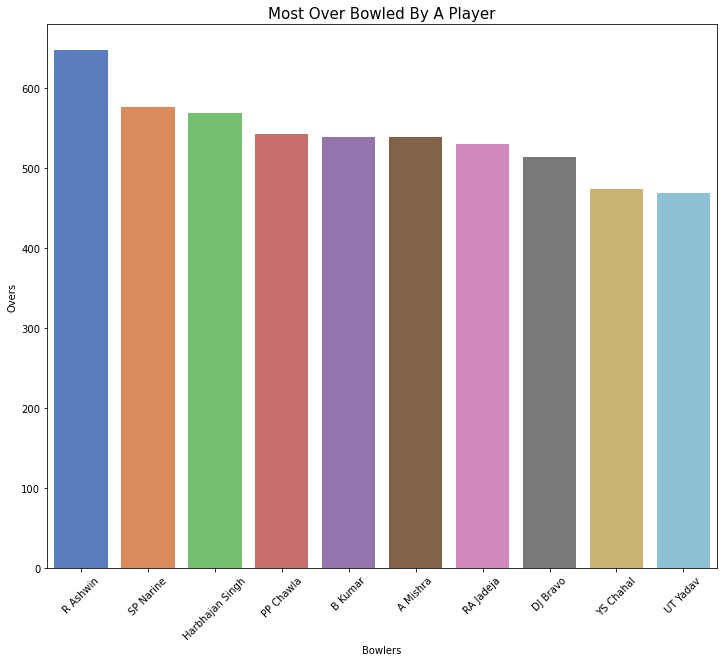

In [130]:
plt.figure(figsize=(12,10))
sns.barplot(x=Most_overs.index,y=Most_overs.values,palette='muted')
plt.title('Most Over Bowled By A Player',fontsize=15)
plt.xlabel('Bowlers')
plt.xticks(rotation=45)
plt.ylabel('Overs')
plt.show()

- <b>R Ashwin</b> leads the way with almost 647 overs bowled followed by <b>Sunil Narine</b> an highly skilled off-spinner, captivating audiences with his unorthodox and unpredictable style of bowling.

### Bowler With Most Wickets Throughout The History Of IPL

In [88]:
wickets = ipl_ball_data[(ipl_ball_data['kind']!='run out')&(ipl_ball_data['kind']!='retired hurt')
                 &(ipl_ball_data['kind']!='obstructing the field')].groupby('bowler').sum()
wickets.reset_index(inplace=True)
wickets = wickets.sort_values('isWicketDelivery',ascending = False).head(10)
wickets

,bowler,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
109,DJ Bravo,2734077390,4844,41842,12030,4169,257,4426,1,183
393,SL Malinga,2010509143,4494,29589,10829,3187,290,3477,0,170
468,YS Chahal,3189009699,4590,28972,10556,3524,175,3699,0,166
7,A Mishra,2454638067,5101,34445,11827,3895,125,4020,1,166
317,R Ashwin,3530204343,6300,35179,14461,4380,209,4589,0,157
310,PP Chawla,2379902006,4749,33214,11650,4231,134,4365,0,157
63,B Kumar,3252481791,4992,27744,12212,3816,246,4062,1,154
401,SP Narine,3410107902,4912,36553,12399,3747,152,3899,0,152
149,Harbhajan Singh,2554676135,5246,29463,12478,3925,173,4098,0,150
177,JJ Bumrah,3152455690,4312,30629,10269,3294,201,3495,0,148


- To get the most wickets taken by the bowler elimination of columns is done ie, only Wicket Delivery is taken others are omitted

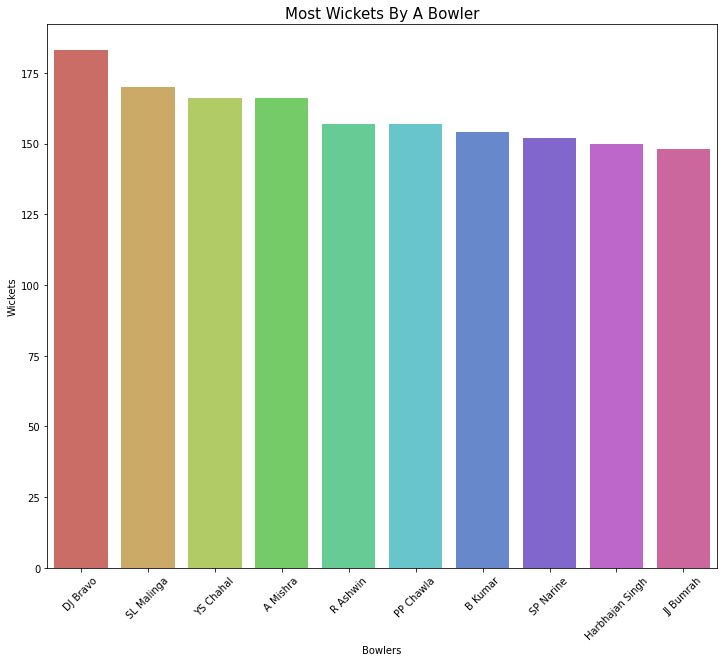

In [134]:
plt.figure(figsize=(12,10))
sns.barplot(x=wickets.bowler,y=wickets.isWicketDelivery,palette='hls')
plt.title('Most Wickets By A Bowler',fontsize=15)
plt.xlabel('Bowlers')
plt.xticks(rotation=45)
plt.ylabel('Wickets')
plt.show()

- <b>DJ Bravo</b>, a true embodiment of versatility and skill, has firmly established himself as a force to be reckoned with in the Indian Premier League (IPL) with 183 wickets delivery.Following closely behind are the phenomenal <b>Lasith Malinga</b> from Sri Lanka and the talented <b>Yuzvendra Chahal</b>, both of whom have left an indelible mark with their bowling prowess.

### Batsman With Most Runs Scored

In [96]:
runs = ipl_ball_data.groupby(['batter'])[['batsman_run']].sum() #getting all batter with there sum of runs
runs.reset_index(inplace=True)
runs = runs.sort_values(by='batsman_run',ascending=False).head(10)
runs

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


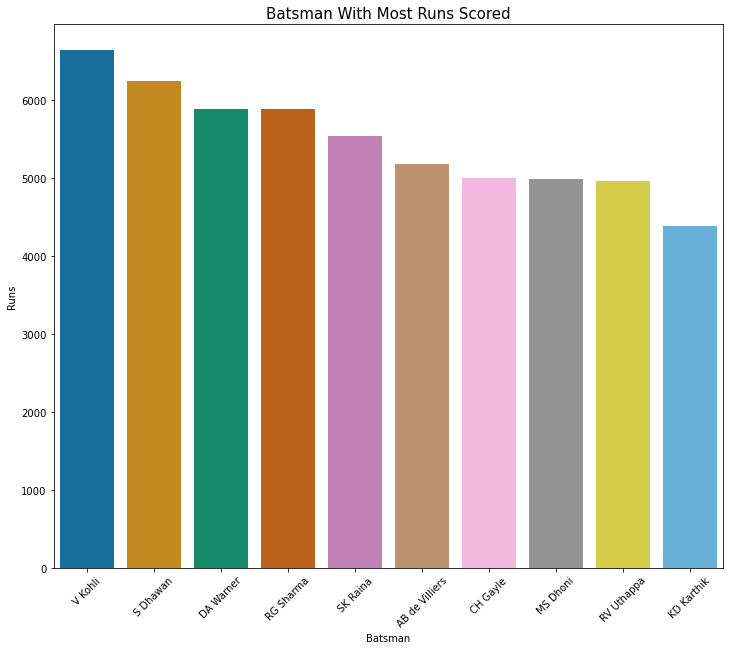

In [132]:
plt.figure(figsize=(12,10))
sns.barplot(x=runs.batter,y=runs.batsman_run,palette='colorblind')
plt.title('Batsman With Most Runs Scored',fontsize=15)
plt.xlabel('Batsman')
plt.xticks(rotation=45)
plt.ylabel('Runs')
plt.show()

- <b>Virat Kohli</b>, whose insatiable hunger for runs has propelled him to the summit of the IPL's all-time run-scoring charts. Following closely are the formidable <b>Shikhar Dhawan</b> and the dynamic <b>David Warner</b>, two exceptional batsmen who have left an indelible mark on the tournament with their run-scoring prowess.

### Most Boundaries And Sixes 

In [61]:
Boundary = ipl_ball_data[(ipl_ball_data['batsman_run'] == 6)|(ipl_ball_data['batsman_run'] == 4)]['batter'].value_counts()[:10]
Boundary

S Dhawan          838
V Kohli           800
DA Warner         793
CH Gayle          767
RG Sharma         760
SK Raina          710
AB de Villiers    667
RV Uthappa        663
MS Dhoni          575
SR Watson         567
Name: batter, dtype: int64

In [62]:
sixes=ipl_ball_data[ipl_ball_data['batsman_run'] == 6]['batter'].value_counts()[:10] #Slicing to get only top 10 players
sixes

CH Gayle          359
AB de Villiers    253
RG Sharma         241
MS Dhoni          229
KA Pollard        224
V Kohli           219
DA Warner         216
SK Raina          204
SR Watson         190
RV Uthappa        182
Name: batter, dtype: int64

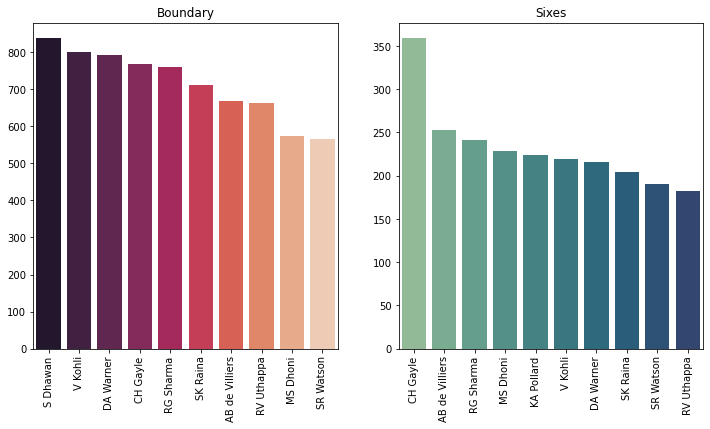

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.barplot(x=Boundary.index,y=Boundary.values,ax=ax[0],palette='rocket') #Subplots is used to display two graphs
ax[0].set_title('Boundary')
ax[0].tick_params(axis='x',rotation=90)
sns.barplot(x=sixes.index,y=sixes.values,ax=ax[1],palette='crest')
ax[1].set_title('Sixes')
ax[1].tick_params(axis='x',rotation=90)
plt.show()

- <b>Shikhar Dhawan</b>, a renowned cricketer known for his graceful stroke play, holds the distinction of hitting the most boundaries, while the explosive <b>Chris Gayle</b> stands tall as the player with the most sixes in the history of IPL.

### Players With The Most 'Player Of The Match' Titles

In [58]:
top_player = ipl_data['Player_of_Match'].value_counts()[:10]
top_player

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
Name: Player_of_Match, dtype: int64

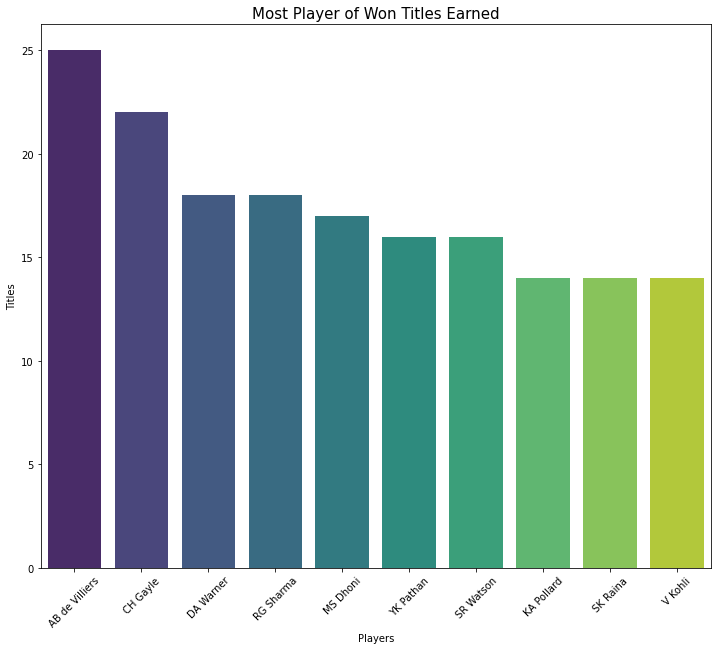

In [135]:
plt.figure(figsize=(12,10))
sns.barplot(x=top_player.index,y=top_player.values,palette='viridis')
plt.title('Most Player of Won Titles Earned',fontsize=15)
plt.xlabel('Players')
plt.xticks(rotation=45)
plt.ylabel('Titles')
plt.show()

- <b>AB de Villiers</b>' sheer dominance and impact have culminated in an unparalleled tally of <b>25 Player of the Match titles</b>, a testament to his unmatched consistency and match-winning prowess.
- Not far behind, the enigmatic <b>Chris Gayle</b> has established himself as a force to be reckoned with in the realm of cricket. His powerful stroke play, unrelenting aggression, and sheer flair have captivated audiences worldwide.His commendable record of <b>22 Player of the Match titles</b> speaks volumes about his incredible talent and unwavering impact on the game.